# Segmentation 
STP : segmentation ,target ,Positioning \
FMCG - Fast moving conusmer good \
RFM : recurrence , frequency,monestary\
Segmentation : Based on homogenous 
characterstics object are grouped
- compare purchase behaviour 
- different segments may respond differently
- consumer data
- Demographic
- geographic
- psychographic 
- Behavioral - historical data, time ,purchase quantity ,product ratings \
 **Targeting** \
  Evaluting potential profits from segments and deciing which segments to focus on \
 Factors Considerations:
 - Segment size 
 - Expected growth 
 - Competitors offerings

 **Positioning** \
 What Product would have closet characteristics to customers needs
 - How to presente to customer
 - Channels - Marketing mix \

 **Question to address** \
 1. Purchase Probability 
 2. Brand Choice Probability
 3. Purchase quantity

**Marketing MIx** \
4-Ps- [ Product, Price,Promotion,Place]
 - Product - Feature
 - Price - Product cost, long-term price change, discount 
 - Promotion - How product is being communicated or advertised \
  - how product is being communicated or advertised
  - related activites to its actual sale and communication \


 - Place - where product will be offered or distributed 
   - Intensive distribution - coco cala
   - Selective distribution - tech product
   -  Exclusive Distribution - Luxury status product



# Retail store 
- physical and online store 
  - physical store have restricated location,
  walmart and amazon
  - location that define them 
  - Online store are gold mine when it comes to online store .More and Diverse data
- Return and refund 
  - returns are likely to be minimum in physical store 
  - online we've database that can tack on past consumer behaviour which can be valuable feature for modeling probability
  -  Data stored at online product have great signifacnt 
 



# implement what you learn 
- segmentation data set 
- 6 step  process in data
- import libraries
- clean the data
- make it ready for processing 
- chosse the model 
- evaluate model 
- Deploy model


In [ ]:
                                                                                                                                                                                              import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn as skl
import seaborn as sns 

In [ ]:
!cp /content/drive/MyDrive/Datasets/customer_segmentation/customer-segmentation-dataset.zip /content/

In [ ]:
!unzip /content/drive/MyDrive/datasets/data.csv.zip
!cp customer-segmentation-dataset/

Archive:  /content/drive/MyDrive/datasets/data.csv.zip
  inflating: data.csv                
cp: missing destination file operand after 'customer-segmentation-dataset/'
Try 'cp --help' for more information.


In [ ]:
df = pd.read_csv('/content/data.csv',engine='python',quoting=0)

# Data Exploration and Preprocessing 

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
import datetime as dt 

In [ ]:
df1=df.copy()

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df1=df1.fillna(0);

In [ ]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
{col: len(df1[col].unique()) for col in df1.columns}

{'Country': 38,
 'CustomerID': 4373,
 'Description': 4224,
 'InvoiceDate': 23260,
 'InvoiceNo': 25900,
 'Quantity': 722,
 'StockCode': 4070,
 'UnitPrice': 1630}

In [ ]:
df1['StockCode'].value_counts().sort_values(ascending=False).head()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: StockCode, dtype: int64

In [ ]:
df1=df1[~df1['InvoiceNo'].str.contains('C',na=False)]

- Effective price = quantity*price

In [ ]:
df1['eff_price']=df1['Quantity']*df1['UnitPrice']

# calculation of RFM metrics
- Recency - number of days between today_Date and last purchase of customer
- Frequency - number of purchase of particaular customer
- Monetary - Sum of total Price of particular customer 

In [ ]:
#changin date time format of data frame
df1['InvoiceDate']=pd.to_datetime(df.InvoiceDate)

In [ ]:
#last date of purchase
df1['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
# To make sure none of recency value become zero
today_Date=dt.datetime(2011,12,11)
today_Date

datetime.datetime(2011, 12, 11, 0, 0)

In [ ]:
today_Date=dt.datetime(2011,9,11)

In [ ]:
rfm=df1.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate:(today_Date-InvoiceDate.max()).days,
                                  'InvoiceNo':lambda InvoiceNo:InvoiceNo.nunique(),
                                  'eff_price':lambda eff_price:eff_price.sum()})

In [ ]:
rfm.tail()

,InvoiceDate,InvoiceNo,eff_price
CustomerID,,,
18280.0,187,1,180.60
18281.0,90,1,80.82
18282.0,-83,2,178.05
18283.0,-87,16,2094.88
18287.0,-48,3,1837.28


In [ ]:
rfm.columns=['recency','frequency','monetary']

In [ ]:
rfm.tail()

,recency,frequency,monetary
CustomerID,,,
18280.0,187,1,180.60
18281.0,90,1,80.82
18282.0,-83,2,178.05
18283.0,-87,16,2094.88
18287.0,-48,3,1837.28


In [ ]:
rfm=rfm[rfm['monetary']>0]
rfm.head()

,recency,frequency,monetary
CustomerID,,,
0.0,-90,3528,1733152.52
12346.0,235,1,77183.60
12347.0,-88,7,4310.00
12348.0,-15,4,1797.24
12349.0,-72,1,1757.55


In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,eff_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
rfm=rfm.drop(rfm.index[0])

In [ ]:
rfm['recency_score']=pd.qcut(rfm['recency'],5 ,labels=[5,4,3,2,1])
rfm['frequency_score']=pd.qcut(rfm['frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm['monetary_score']=pd.qcut(rfm['monetary'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm['rfm_score']=(rfm['recency_score'].astype(str)+rfm['frequency_score'].astype(str))

# interpretaion 
- recency score = time-duration,low value means don't frequently shop
-  frequency score : high frqency means spedn frequently
- monetary_value :Total amount spend 


In [ ]:
rfm.head(5)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
CustomerID,,,,,,,
12346.0,235,1,77183.60,1,1,5,11
12347.0,-88,7,4310.00,5,5,5,55
12348.0,-15,4,1797.24,2,4,4,24
12349.0,-72,1,1757.55,4,1,4,41
12350.0,220,1,334.40,1,1,2,11


#seg_map define
<table>
<tr>
<th>Recency</h1>
<th>Frequency</th>
<th>consumer behaviour</th>
<th>Customer Type</th>
</tr>
<tr>
<th>1,2</h1>
<th>1,2</th>
<th>very long duration,very low frequency</th>
<th>Hibernating</th>
</tr>
<tr>
<th>1,2</h1>
<th>3,4</th>
<th>very long duration,moderate frequecy</th>
<th>$\color{red}{\text{At risk}}$</th>
</tr>
<tr>
<th>1,2</h1>
<th>5</th>
<th>very long duration,high frquency</th>
<th>$\color{violet}{\text{Can't loose}}$</th>
</tr>
<tr>
<th>3</h1>
<th>1,2</th>
<th>avg duration,low frequncy</th>
<th>about to sleep</th>
</tr>
<tr>
<th>3</h1>
<th>3</th>
<th>avg duration,avg frequency</th>
<th>$\color{violet}{\text{need attention}}$</th>
</tr>
<tr>
<th>3,4</h1>
<th>4,5</th>
<th>short duration,high frequency</th>
<th>$\color{green}{\text{Loyal customer}}$</th>
</tr>
<tr>
<th>4</h1>
<th>1</th>
<th>short duration,low frquency</th>
<th>$\color{red}{\text{promissing}}$</th>
</tr>
<tr>
<th>5</h1>
<th>1</th>
<th>very short duration,low frquecy</th>
<th>$\color{blue}{\text{New customer}}$</th>
</tr>
<tr>
<th>4,5</h1>
<th>2,3</th>
<th>short to very short duration,low frequency</th>
<th>$\color{red}{\text{Potential_loyalists}}$</th>
</tr>
<tr>
<th>5</h1>
<th>4,5</th>
<th>very short duration,high frequency</th>
<th> $\color{green}{\text{Champions}}$</th>
<th></th>
</tr>
</table>

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [ ]:
rfm['segment']=rfm['rfm_score'].replace(seg_map,regex=True)

In [ ]:
rfm[['segment','recency','frequency','monetary']].groupby('segment').agg(['mean','count'])

recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep       -37.687500   352   1.161932   352   471.994375   352
at_Risk               62.785835   593   2.878583   593  1084.535297   593
cant_loose            41.968254    63   8.380952    63  2796.155873    63
champions            -84.638231   633  12.417062   633  6857.935482   633
hibernating          126.605042  1071   1.101774  1071   488.643307  1071
loyal_customers      -57.391941   819   6.479853   819  2864.247791   819
need_attention       -38.572193   187   2.326203   187   897.627861   187
new_customers        -83.571429    42   1.000000    42   388.212857    42
potential_loyalists  -73.601240   484   2.010331   484  1041.222004   484
promising            -67.489362    94   1.000000    94   294.007979    94

In [ ]:
champions=rfm[rfm['segment']=='champions']
champions[['recency','frequency','monetary']].agg(['mean', 'count'])


,recency,frequency,monetary
mean,-84.638231,12.417062,6857.935482
count,633.000000,633.000000,633.000000


In [ ]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment
CustomerID,,,,,,,,
12346.0,235,1,77183.60,1,1,5,11,hibernating
12347.0,-88,7,4310.00,5,5,5,55,champions
12348.0,-15,4,1797.24,2,4,4,24,at_Risk
12349.0,-72,1,1757.55,4,1,4,41,promising
12350.0,220,1,334.40,1,1,2,11,hibernating


In [ ]:
data=(rfm.segment,rfm.frequency)

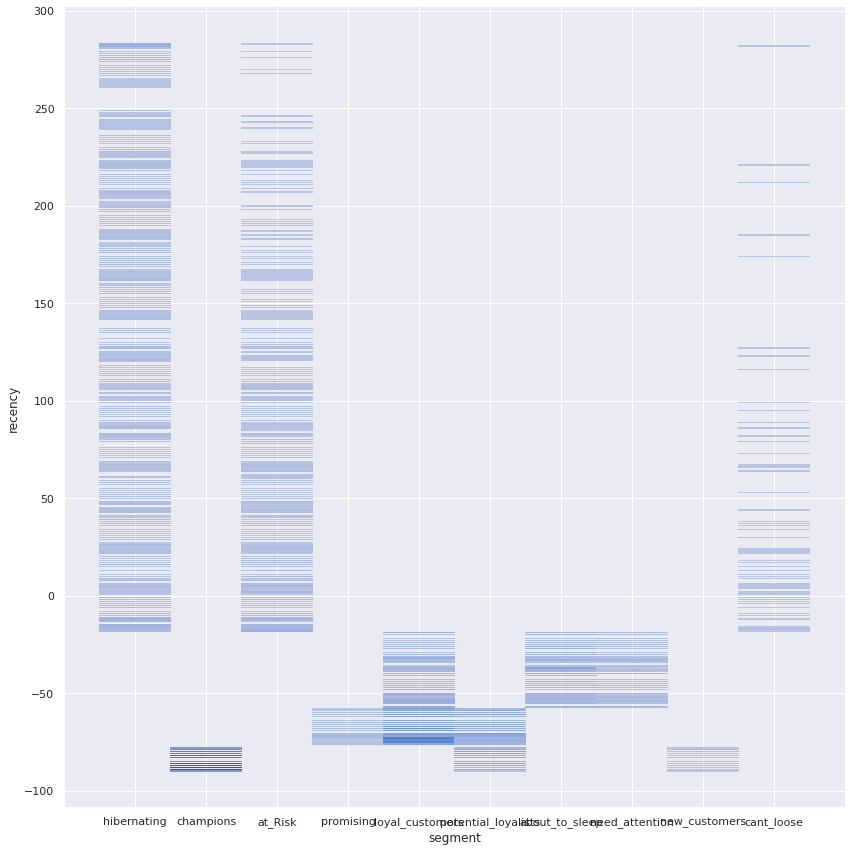

In [ ]:
sns.set_theme(style="darkgrid")
g=sns.displot(
            y=rfm['recency'],
            x=rfm['segment'],
            binwidth=0.2, height=12
             );
